In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv("used_device_data.csv")
df.head(3)

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [69]:
min_new_price = df["normalized_new_price"].min()
max_new_price = df["normalized_new_price"].max()
print(min_new_price, max_new_price)

2.901421594 7.847840659


In [70]:
def denormalize_price(norm_price, min_price, max_price):
    return norm_price * (max_price - min_price) + min_price



In [71]:
# Check for missing values
df.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<Axes: >

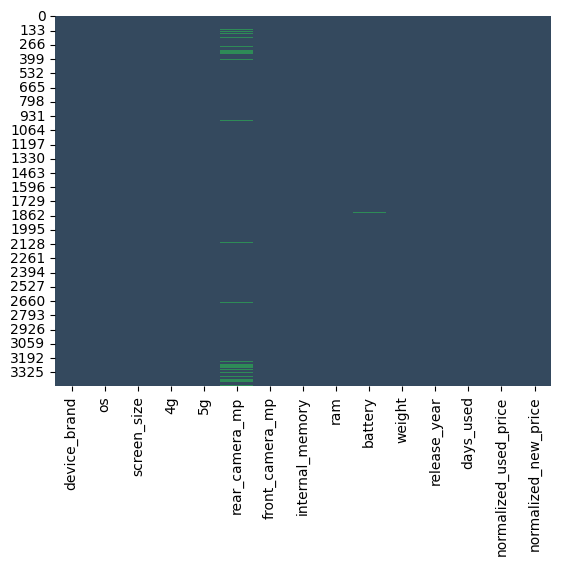

In [72]:
colours = ['#34495E', 'seagreen'] 
sns.heatmap(df.isnull(), cbar=False , cmap=sns.color_palette(colours))


# Filling the Missing Values

C:\Users\reply\AppData\Local\Temp\ipykernel_7744\3572305447.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='front_camera_mp', data=df, palette='viridis')


<Axes: xlabel='front_camera_mp', ylabel='count'>

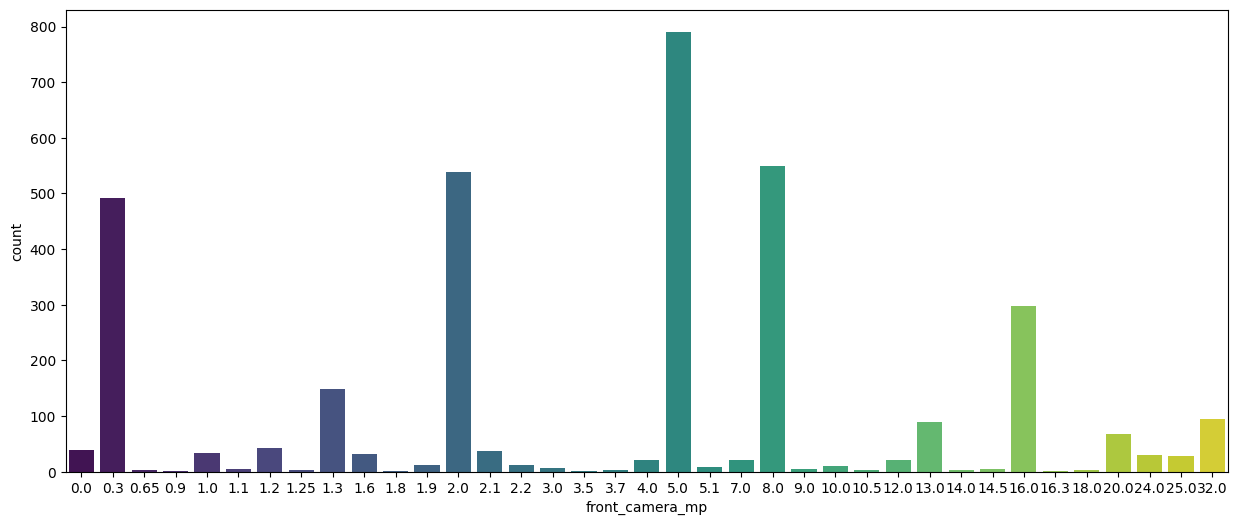

In [73]:
plt.figure(figsize=(15,6))
sns.countplot(x='front_camera_mp', data=df, palette='viridis')

In [74]:
df["front_camera_mp"].fillna(df["front_camera_mp"].mean() , inplace= True)

C:\Users\reply\AppData\Local\Temp\ipykernel_7744\1761644421.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["front_camera_mp"].fillna(df["front_camera_mp"].mean() , inplace= True)


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3454 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

C:\Users\reply\AppData\Local\Temp\ipykernel_7744\3657489316.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rear_camera_mp', data=df, palette='viridis')


<Axes: xlabel='rear_camera_mp', ylabel='count'>

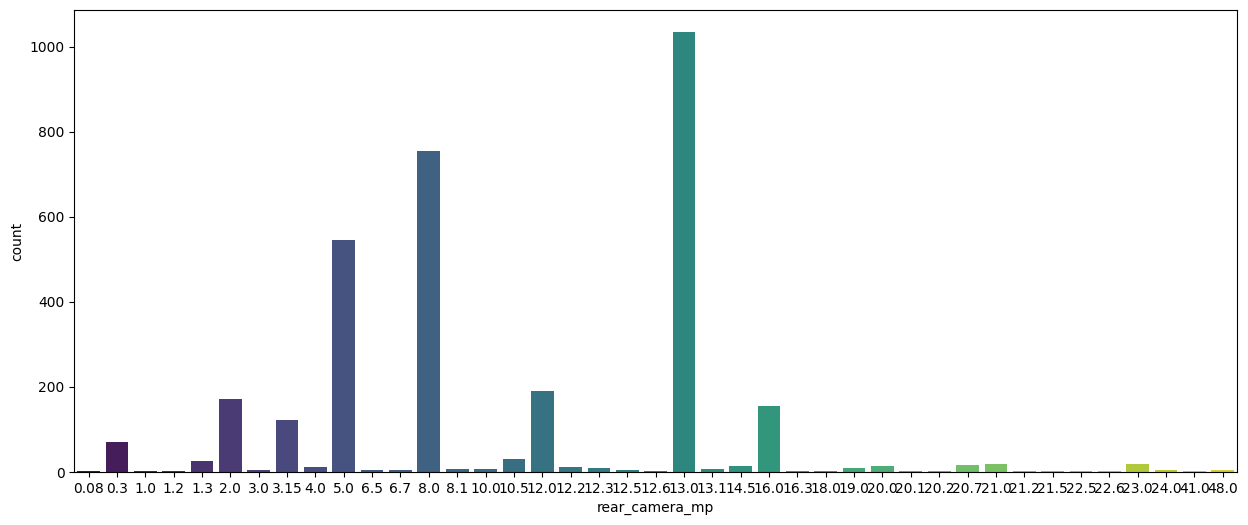

In [76]:
plt.figure(figsize=(15,6))
sns.countplot(x='rear_camera_mp', data=df, palette='viridis')

In [77]:
df["rear_camera_mp"].value_counts()

rear_camera_mp
13.00    1035
8.00      755
5.00      546
12.00     189
2.00      171
16.00     154
3.15      122
0.30       69
10.50      30
1.30       26
23.00      19
21.00      19
20.70      16
20.00      13
14.50      13
12.20      12
4.00       10
12.30       9
19.00       8
8.10        7
13.10       6
10.00       6
24.00       5
3.00        5
12.50       4
48.00       4
6.50        4
6.70        4
21.20       2
21.50       1
1.20        1
16.30       1
22.60       1
18.00       1
12.60       1
20.10       1
41.00       1
20.20       1
1.00        1
0.08        1
22.50       1
Name: count, dtype: int64

In [78]:
df["rear_camera_mp"].fillna(df["rear_camera_mp"].mode()[0] , inplace= True)

C:\Users\reply\AppData\Local\Temp\ipykernel_7744\868988896.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rear_camera_mp"].fillna(df["rear_camera_mp"].mode()[0] , inplace= True)


In [79]:
df.isna().sum() 

device_brand             0
os                       0
screen_size              0
4g                       0
5g                       0
rear_camera_mp           0
front_camera_mp          0
internal_memory          4
ram                      4
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [80]:
def fill_null_values(colums):
        colums.fillna(colums.mode()[0] , inplace= True)

In [81]:
fill_null_values(df["internal_memory"])
fill_null_values(df["ram"])
fill_null_values(df["battery"])
fill_null_values(df["weight"])

In [82]:
df.isna().sum()/len(df)*100

device_brand             0.0
os                       0.0
screen_size              0.0
4g                       0.0
5g                       0.0
rear_camera_mp           0.0
front_camera_mp          0.0
internal_memory          0.0
ram                      0.0
battery                  0.0
weight                   0.0
release_year             0.0
days_used                0.0
normalized_used_price    0.0
normalized_new_price     0.0
dtype: float64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3454 non-null   float64
 6   front_camera_mp        3454 non-null   float64
 7   internal_memory        3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

There are no More Null Values in the DataFrame

# Exploratory Data Analysis

In [84]:
df.head(4)

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961


In [85]:
df.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.643654,6.554229,54.528428,4.036080,3134.908078,182.685495,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.754206,6.968353,84.933275,1.364314,1299.054664,88.335850,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,10.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [86]:
df['os'].unique()

array(['Android', 'Others', 'iOS', 'Windows'], dtype=object)

In [87]:
df['os'].value_counts()

os
Android    3214
Others      137
Windows      67
iOS          36
Name: count, dtype: int64

In [88]:
df_encoded = pd.get_dummies(df, columns=['os'])

In [89]:
df_encoded.head(3)

,device_brand,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,os_Android,os_Others,os_Windows,os_iOS
0,Honor,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,True,False,False,False
1,Honor,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,True,False,False,False
2,Honor,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,True,False,False,False


In [90]:
import os
types_of_device = df["device_brand"].value_counts()
print(types_of_device)
with open("Device_Names.txt", "w") as file:
    for device in types_of_device.index:
        file.write(device)


device_brand
Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: count, dtype: int64


In [91]:
df_encoded = pd.get_dummies(df_encoded, columns=['device_brand'])

In [92]:
df_encoded.head(3)

,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,...,device_brand_Others,device_brand_Panasonic,device_brand_Realme,device_brand_Samsung,device_brand_Sony,device_brand_Spice,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE
0,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,...,False,False,False,False,False,False,False,False,False,False
1,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,...,False,False,False,False,False,False,False,False,False,False
2,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,...,False,False,False,False,False,False,False,False,False,False


In [93]:
df_encoded = df_encoded.replace({'no': 0, 'yes': 1})    

C:\Users\reply\AppData\Local\Temp\ipykernel_7744\3693205377.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_encoded.replace({'no': 0, 'yes': 1})


In [94]:
df_encoded.head(3)

,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,...,device_brand_Others,device_brand_Panasonic,device_brand_Realme,device_brand_Samsung,device_brand_Sony,device_brand_Spice,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE
0,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,...,False,False,False,False,False,False,False,False,False,False
1,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,...,False,False,False,False,False,False,False,False,False,False
2,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,...,False,False,False,False,False,False,False,False,False,False


In [95]:
df_encoded = df_encoded.replace({'False': 0, 'True': 1})

In [96]:
df_encoded.head(3)

,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,...,device_brand_Others,device_brand_Panasonic,device_brand_Realme,device_brand_Samsung,device_brand_Sony,device_brand_Spice,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE
0,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,...,False,False,False,False,False,False,False,False,False,False
1,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,...,False,False,False,False,False,False,False,False,False,False
2,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,...,False,False,False,False,False,False,False,False,False,False


In [97]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   screen_size              3454 non-null   float64
 1   4g                       3454 non-null   int64  
 2   5g                       3454 non-null   int64  
 3   rear_camera_mp           3454 non-null   float64
 4   front_camera_mp          3454 non-null   float64
 5   internal_memory          3454 non-null   float64
 6   ram                      3454 non-null   float64
 7   battery                  3454 non-null   float64
 8   weight                   3454 non-null   float64
 9   release_year             3454 non-null   int64  
 10  days_used                3454 non-null   int64  
 11  normalized_used_price    3454 non-null   float64
 12  normalized_new_price     3454 non-null   float64
 13  os_Android               3454 non-null   bool   
 14  os_Others               

In [98]:
df["4g"] = df["4g"].map({'yes': 1, 'no': 0}).astype(int)
df["5g"] = df["5g"].map({'yes': 1, 'no': 0}).astype(int)
df_encoded["4g"] = df["4g"]
df_encoded["5g"] = df["5g"]

In [99]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   screen_size              3454 non-null   float64
 1   4g                       3454 non-null   int32  
 2   5g                       3454 non-null   int32  
 3   rear_camera_mp           3454 non-null   float64
 4   front_camera_mp          3454 non-null   float64
 5   internal_memory          3454 non-null   float64
 6   ram                      3454 non-null   float64
 7   battery                  3454 non-null   float64
 8   weight                   3454 non-null   float64
 9   release_year             3454 non-null   int64  
 10  days_used                3454 non-null   int64  
 11  normalized_used_price    3454 non-null   float64
 12  normalized_new_price     3454 non-null   float64
 13  os_Android               3454 non-null   bool   
 14  os_Others               

In [100]:
df_encoded = df_encoded.astype(int)


In [101]:
df_encoded.head(3)

,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,...,device_brand_Others,device_brand_Panasonic,device_brand_Realme,device_brand_Samsung,device_brand_Sony,device_brand_Spice,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE
0,14,1,0,13,5,64,3,3020,146,2020,...,0,0,0,0,0,0,0,0,0,0
1,17,1,1,13,16,128,8,4300,213,2020,...,0,0,0,0,0,0,0,0,0,0
2,16,1,1,13,8,128,8,4200,213,2020,...,0,0,0,0,0,0,0,0,0,0


In [102]:
df_encoded["normalized_new_price"]

0       4
1       5
2       5
3       5
4       4
       ..
3449    6
3450    6
3451    4
3452    4
3453    4
Name: normalized_new_price, Length: 3454, dtype: int32

In [103]:
df_encoded["normalized_used_price"]

0       4
1       5
2       5
3       5
4       4
       ..
3449    4
3450    5
3451    4
3452    4
3453    4
Name: normalized_used_price, Length: 3454, dtype: int32

In [104]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   screen_size              3454 non-null   int32
 1   4g                       3454 non-null   int32
 2   5g                       3454 non-null   int32
 3   rear_camera_mp           3454 non-null   int32
 4   front_camera_mp          3454 non-null   int32
 5   internal_memory          3454 non-null   int32
 6   ram                      3454 non-null   int32
 7   battery                  3454 non-null   int32
 8   weight                   3454 non-null   int32
 9   release_year             3454 non-null   int32
 10  days_used                3454 non-null   int32
 11  normalized_used_price    3454 non-null   int32
 12  normalized_new_price     3454 non-null   int32
 13  os_Android               3454 non-null   int32
 14  os_Others                3454 non-null   int32
 15  os_W

# Checking the Co-relation bwteeen the features using the Co-relation Matrix

<Axes: >

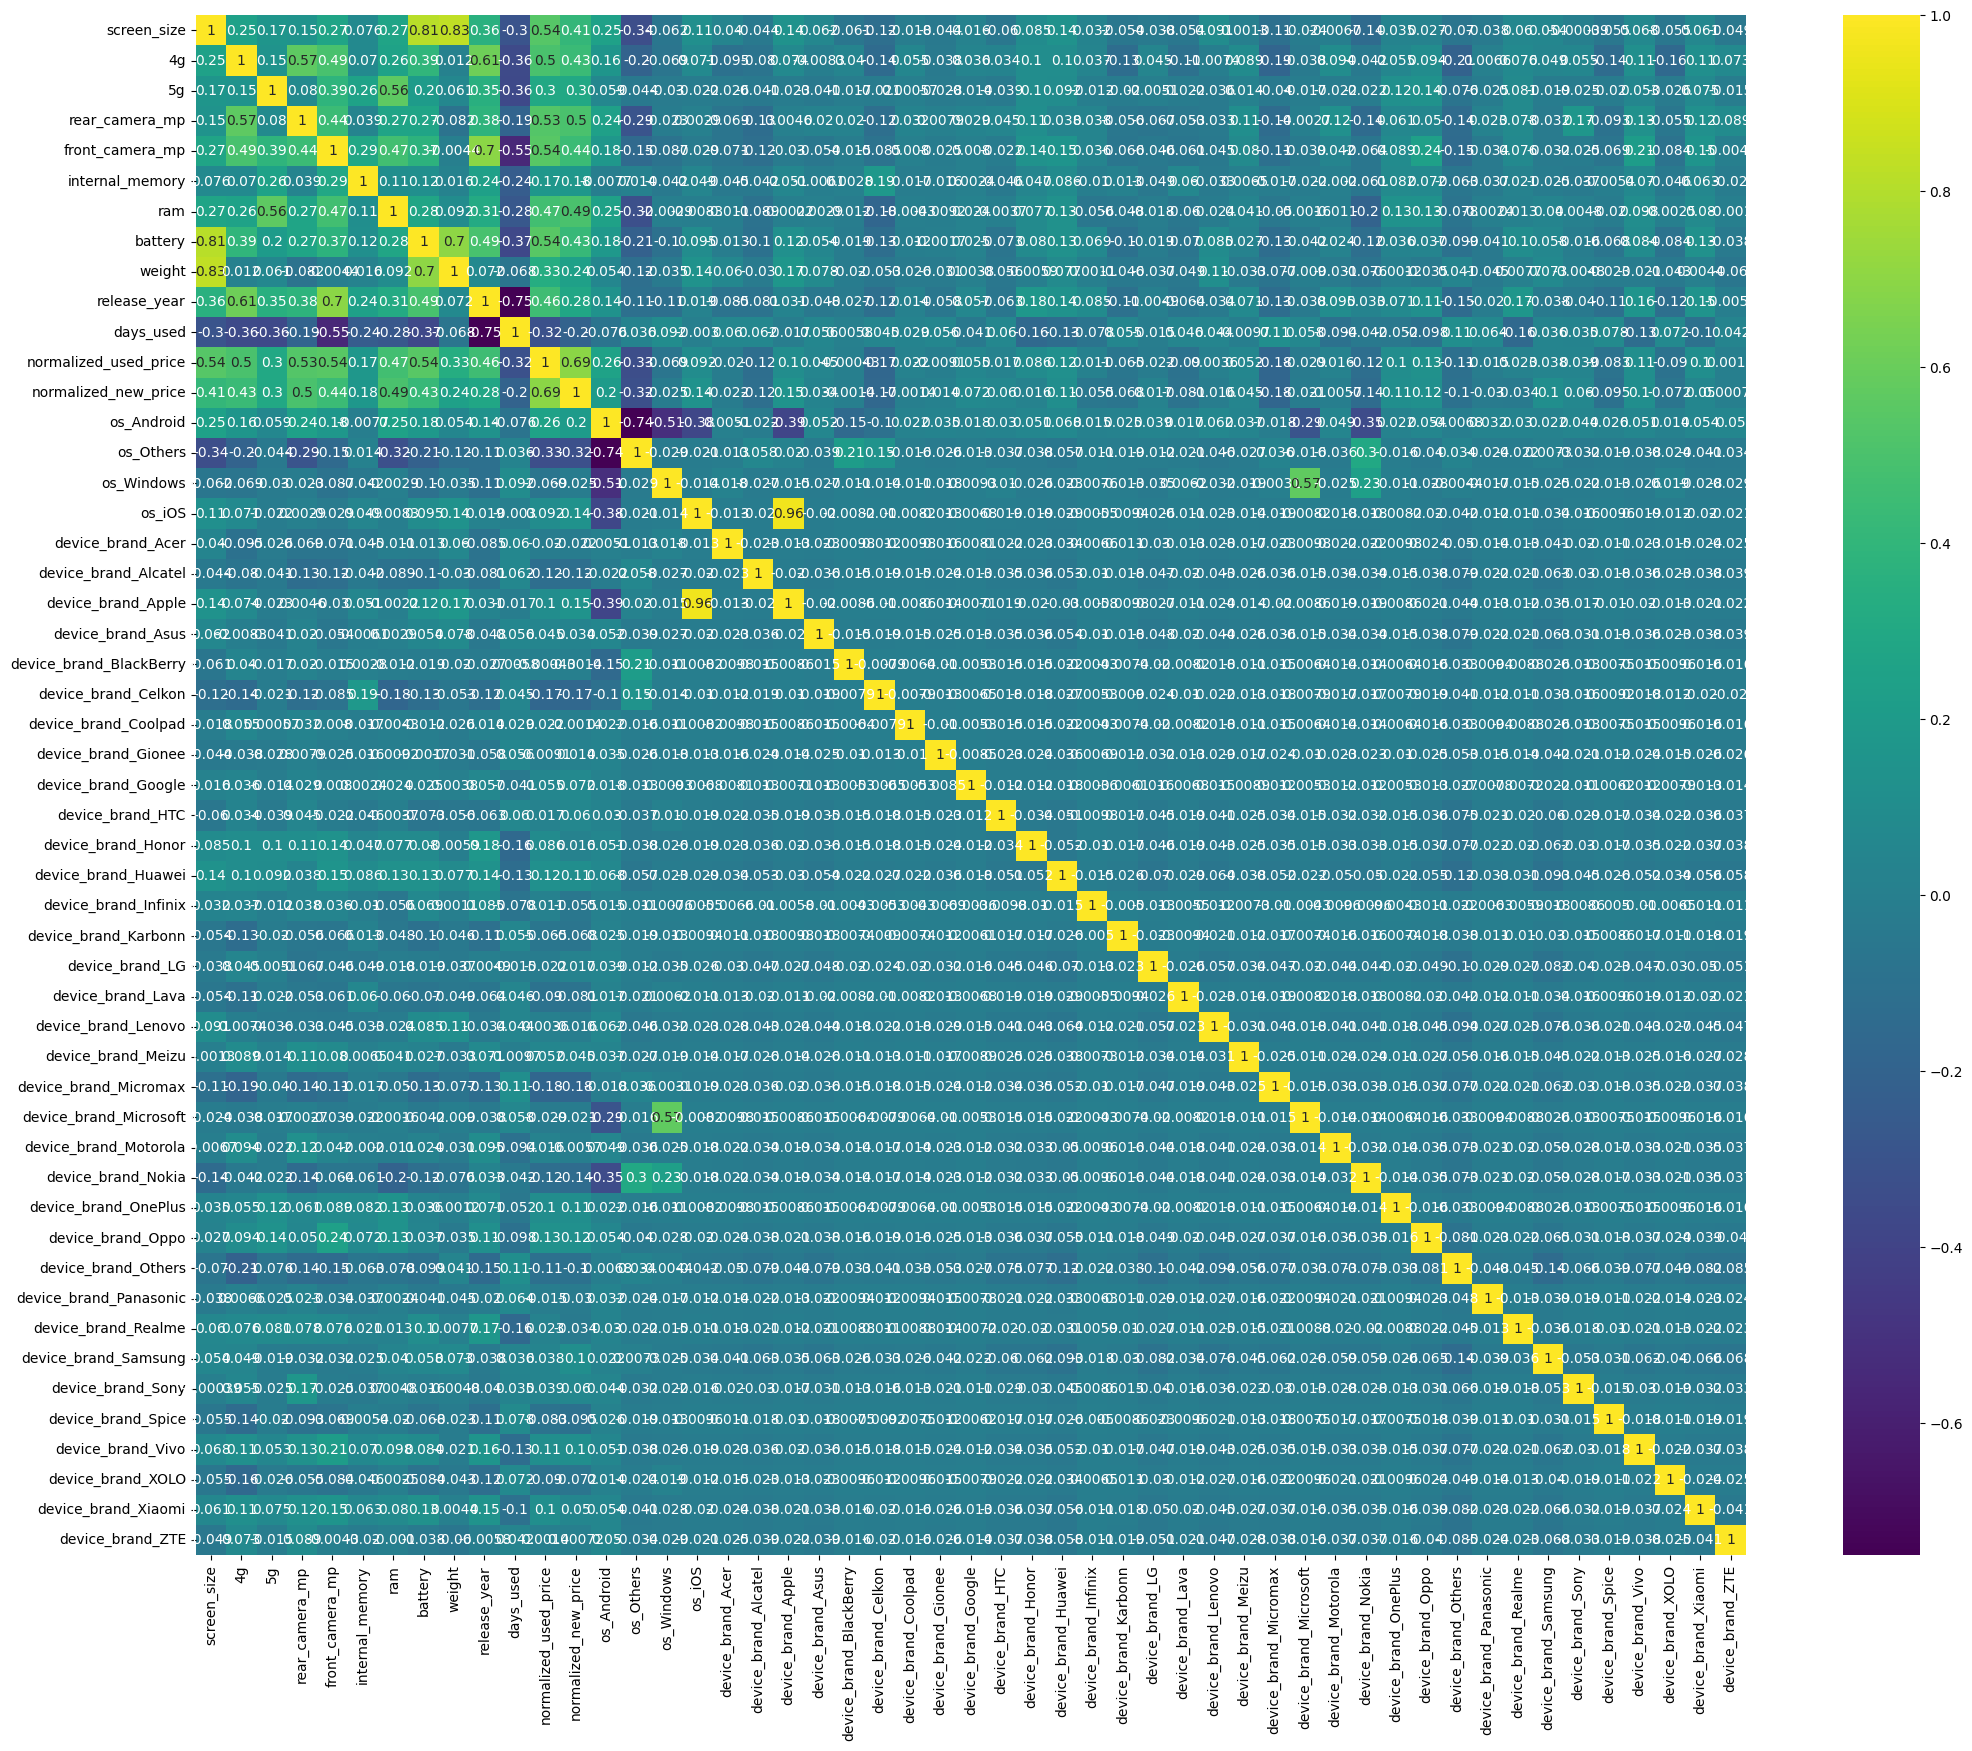

In [105]:
# Making a Correlation Matrix
plt.figure(figsize=(25,20))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

In [106]:
corr_matrix = df_encoded.corr().abs()
print(corr_matrix)


                         screen_size        4g        5g  rear_camera_mp  \
screen_size                 1.000000  0.247005  0.165746        0.149727   
4g                          0.247005  1.000000  0.148527        0.568522   
5g                          0.165746  0.148527  1.000000        0.079800   
rear_camera_mp              0.149727  0.568522  0.079800        1.000000   
front_camera_mp             0.269961  0.493612  0.388898        0.444226   
internal_memory             0.076280  0.070223  0.261155        0.038953   
ram                         0.273401  0.256578  0.563966        0.271767   
battery                     0.808557  0.393750  0.204175        0.272944   
weight                      0.832089  0.012135  0.061241        0.082422   
release_year                0.362548  0.612454  0.354571        0.384193   
days_used                   0.295813  0.358217  0.363333        0.191005   
normalized_used_price       0.536634  0.497796  0.297423        0.529671   
normalized_n

In [107]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [108]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Highly Correlated Features to Remove:", to_drop)

Highly Correlated Features to Remove: ['device_brand_Apple']


There Seems no Features to be removed from the Data-frame and Thus we can Procced to Model Traning Now 

# Model traning


In [109]:
df_encoded = df_encoded.drop(columns=["normalized_new_price"])

In [110]:
X = df_encoded.drop(columns = [ 'normalized_used_price'])
y = df_encoded['normalized_used_price']

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2763 entries, 1295 to 3174
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   screen_size              2763 non-null   int32
 1   4g                       2763 non-null   int32
 2   5g                       2763 non-null   int32
 3   rear_camera_mp           2763 non-null   int32
 4   front_camera_mp          2763 non-null   int32
 5   internal_memory          2763 non-null   int32
 6   ram                      2763 non-null   int32
 7   battery                  2763 non-null   int32
 8   weight                   2763 non-null   int32
 9   release_year             2763 non-null   int32
 10  days_used                2763 non-null   int32
 11  os_Android               2763 non-null   int32
 12  os_Others                2763 non-null   int32
 13  os_Windows               2763 non-null   int32
 14  os_iOS                   2763 non-null   int32
 15  device

In [113]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error , mean_squared_error
import numpy as np

def evaluate_regression_models(models, X_train, y_train, X_test, y_test):
    """
    Trains multiple regression models, evaluates them, and returns the best two based on RMSE.
    
    Parameters:
    models (dict): Dictionary of model name and corresponding regression model object.
    X_train (DataFrame): Training features.
    y_train (Series): Training target variable.
    X_test (DataFrame): Testing features.
    y_test (Series): Testing target variable.

    Returns:
    list: Best two models based on RMSE.
    """

    results = []

    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)
        
        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Evaluation metrics
        
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        r2 = r2_score(y_test, y_test_pred)
        mae = mean_absolute_error(y_test, y_test_pred)

        
        print(f"\nModel: {name}")
        print(f"Train RMSE: {train_rmse:.4f}")
        print(f"Test RMSE: {test_rmse:.4f}")
        print(f"R² Score: {r2:.4f}")
        print(f"MAE: {mae:.4f}")
        print("-" * 40)
        
        # Store results
        results.append((name, model, test_rmse, r2, mae))

    # Sort models by RMSE (lower is better)
    results.sort(key=lambda x: x[2])

    print("\nBest Two Models:")
    best_models = results[:2]
    for rank, (name, model, rmse, r2, mae) in enumerate(best_models, start=1):
        print(f"{rank}. {name} - Test RMSE: {rmse:.4f}")

    return [best_models[0][1], best_models[1][1]]  # Return the best two models


In [114]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Call function
best_models = evaluate_regression_models(models, x_train, y_train, x_test, y_test)


Training Linear Regression...

Model: Linear Regression
Train RMSE: 0.3951
Test RMSE: 0.4074
R² Score: 0.5736
MAE: 0.3125
----------------------------------------
Training Ridge Regression...

Model: Ridge Regression
Train RMSE: 0.3951
Test RMSE: 0.4073
R² Score: 0.5736
MAE: 0.3125
----------------------------------------
Training Lasso Regression...

Model: Lasso Regression
Train RMSE: 0.4228
Test RMSE: 0.4277
R² Score: 0.5299
MAE: 0.3333
----------------------------------------
Training Random Forest...

Model: Random Forest
Train RMSE: 0.1437
Test RMSE: 0.3993
R² Score: 0.5903
MAE: 0.2612
----------------------------------------
Training Support Vector Regressor...

Model: Support Vector Regressor
Train RMSE: 0.4819
Test RMSE: 0.4772
R² Score: 0.4149
MAE: 0.3345
----------------------------------------
Training Decision Tree...

Model: Decision Tree
Train RMSE: 0.0000
Test RMSE: 0.5160
R² Score: 0.3158
MAE: 0.2605
----------------------------------------

Best Two Models:
1. Random 

In [115]:
from sklearn.model_selection import GridSearchCV

def tune_model(model, param_grid, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1):
    """
    Performs hyperparameter tuning using GridSearchCV to find the best model parameters.
    
    Parameters:
    - model: The machine learning model to tune.
    - param_grid: Dictionary of hyperparameters to test.
    - X_train: Training features.
    - y_train: Training labels.
    - cv: Number of cross-validation folds (default=5).
    - scoring: Metric for evaluation (default='neg_mean_squared_error' for regression).
    - n_jobs: Number of parallel jobs (-1 means using all processors).
    
    Returns:
    - best_model: The model with the best found hyperparameters.
    - best_params: The best hyperparameters found.
    """
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               cv=cv, scoring=scoring, n_jobs=n_jobs, verbose=2)
    
    grid_search.fit(X_train, y_train)
    
    print("\n✅ Best Parameters Found:", grid_search.best_params_)
    print("\n📌 Best Score:", -grid_search.best_score_)  # MSE is negative in sklearn, so negate it
    
    best_model = grid_search.best_estimator_
    
    return best_model, grid_search.best_params_


In [116]:
from sklearn.ensemble import RandomForestRegressor

# Define your model
model = RandomForestRegressor(random_state=42)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],     # Depth of trees
    'min_samples_split': [2, 5, 10], # Minimum samples needed to split a node
    'min_samples_leaf': [1, 2, 4]    # Minimum samples in each leaf
}

# Tune the model
best_model, best_params = tune_model(model, param_grid, x_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits

✅ Best Parameters Found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

📌 Best Score: 0.14783045288979724


In [117]:
final_model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=4)
final_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200)

In [118]:
score = final_model.score(x_test, y_test)
print("R² Score:", score)

R² Score: 0.6060283983084127


In [119]:
import pickle
with open("model.pkl", "wb") as file:
    pickle.dump(final_model, file)

In [120]:
x_test

,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,...,device_brand_Others,device_brand_Panasonic,device_brand_Realme,device_brand_Samsung,device_brand_Sony,device_brand_Spice,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE
511,17,0,0,2,0,16,4,2820,260,2015,...,0,0,0,0,0,0,0,0,0,0
51,20,1,0,13,8,64,4,6100,320,2019,...,0,0,0,0,0,0,0,0,0,0
1171,12,1,0,13,5,32,4,2300,149,2016,...,0,0,0,0,0,0,0,0,0,0
2282,17,0,0,0,0,16,4,3000,326,2013,...,1,0,0,0,0,0,0,0,0,0
557,10,0,0,5,0,16,4,1700,96,2013,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,7,0,0,3,0,256,0,1030,102,2013,...,1,0,0,0,0,0,0,0,0,0
611,17,0,0,0,0,32,4,3000,402,2013,...,1,0,0,0,0,0,0,0,0,0
3088,15,1,0,13,5,32,4,3100,180,2017,...,0,0,0,0,0,0,0,0,0,1
3170,10,0,0,3,5,16,4,1400,125,2014,...,0,0,0,0,0,0,0,0,0,1


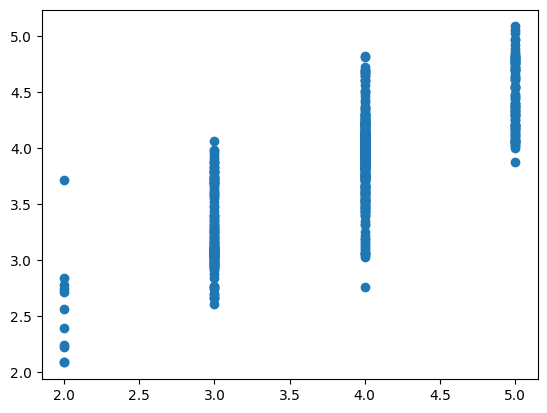

In [121]:
ploting_score = final_model.predict(x_test)
plt.scatter(y_test, ploting_score)

In [122]:
x_test
single_row = x_test.iloc[[0]]  # Double brackets to keep it as a DataFrame
print(single_row)


     screen_size  4g  5g  rear_camera_mp  front_camera_mp  internal_memory  \
511           17   0   0               2                0               16   

     ram  battery  weight  release_year  ...  device_brand_Others  \
511    4     2820     260          2015  ...                    0   

     device_brand_Panasonic  device_brand_Realme  device_brand_Samsung  \
511                       0                    0                     0   

     device_brand_Sony  device_brand_Spice  device_brand_Vivo  \
511                  0                   0                  0   

     device_brand_XOLO  device_brand_Xiaomi  device_brand_ZTE  
511                  0                    0                 0  

[1 rows x 49 columns]


In [123]:
norm_price = final_model.predict(single_row)

In [124]:
denormalize_price(norm_price, min_new_price, max_new_price)

array([21.39797381])